## LS122MSDS0008
## NAME WASEEQ HAIDER
# Tools and techniques in data science
## Introduction
The objective of this project is to train several classification models, and practice model tuning (bias/varience) tradeoff. 

## Procedure and Methodology 
1. Data Set Selection 
2. EDA
3. Models

# 1. Data Set Selection

Objective is to understand the influence of various factors like economic, personal and social on the depression.

## 1.1 Import libraries

In [3]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import missingno as missing
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import random
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score ,auc, plot_roc_curve
from sklearn import svm
import sklearn.metrics
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


## 1.2 Reading the data

In [4]:

df = pd.read_csv("../input/b_depressed.csv")

# preview the data
df.head()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0


## 1.3 Data Dictionary
1. * Survey_id
1. * Ville_id
1. * sex
1. * Age
1. * Married
1. * Number_children
1. * education_level
1. * total_members (in the family)
1. * gained_asset
1. * durable_asset
1. * save_asset
1. * living_expenses
1. * other_expenses
1. * incoming_salary
1. * incoming_own_farm
1. * incoming_business
1. * incoming_no_business
1. * incoming_agricultural
1. * farm_expenses
1. * labor_primary
1. * lasting_investment
1. * no_lasting_investmen
1. * depressed: [ Zero: No depressed]  or [One: depressed] (Binary for target class)

## 1.4 Training Data Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survey_id              1429 non-null   int64  
 1   Ville_id               1429 non-null   int64  
 2   sex                    1429 non-null   int64  
 3   Age                    1429 non-null   int64  
 4   Married                1429 non-null   int64  
 5   Number_children        1429 non-null   int64  
 6   education_level        1429 non-null   int64  
 7   total_members          1429 non-null   int64  
 8   gained_asset           1429 non-null   int64  
 9   durable_asset          1429 non-null   int64  
 10  save_asset             1429 non-null   int64  
 11  living_expenses        1429 non-null   int64  
 12  other_expenses         1429 non-null   int64  
 13  incoming_salary        1429 non-null   int64  
 14  incoming_own_farm      1429 non-null   int64  
 15  inco

> Our data seems to be clean of missing values.

## 1.5 Data description

In [6]:
df.describe()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
count,1429.00000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1.429000e+03,1.429000e+03,...,1429.000000,1429.000000,1429.000000,1429.000000,1.429000e+03,1.429000e+03,1429.000000,1.429000e+03,1.409000e+03,1429.000000
mean,715.00000,76.286214,0.918125,34.777467,0.772568,2.883135,8.687194,4.969209,3.363448e+07,2.717296e+07,...,0.179846,0.251924,0.107768,0.260322,3.451039e+07,3.549153e+07,0.213436,3.299222e+07,3.360385e+07,0.166550
std,412.66108,66.444012,0.274271,13.986219,0.419320,1.874472,2.923532,1.786317,2.003854e+07,1.815672e+07,...,0.384194,0.434270,0.310195,0.438964,2.077846e+07,2.112372e+07,0.409876,2.121621e+07,2.160228e+07,0.372704
min,1.00000,1.000000,0.000000,17.000000,0.000000,0.000000,1.000000,1.000000,3.251120e+05,1.625560e+05,...,0.000000,0.000000,0.000000,0.000000,3.251120e+05,2.715050e+05,0.000000,7.429200e+04,1.263120e+05,0.000000
25%,358.00000,24.000000,1.000000,25.000000,1.000000,2.000000,8.000000,4.000000,2.326982e+07,1.929852e+07,...,0.000000,0.000000,0.000000,0.000000,2.322229e+07,2.279966e+07,0.000000,2.001911e+07,2.064203e+07,0.000000
50%,715.00000,57.000000,1.000000,30.000000,1.000000,3.000000,9.000000,5.000000,2.891220e+07,2.286194e+07,...,0.000000,0.000000,0.000000,0.000000,3.002882e+07,3.136343e+07,0.000000,2.841172e+07,2.829271e+07,0.000000
75%,1072.00000,105.000000,1.000000,42.000000,1.000000,4.000000,10.000000,6.000000,3.717283e+07,2.656950e+07,...,0.000000,1.000000,0.000000,1.000000,4.003842e+07,4.348584e+07,0.000000,3.982686e+07,4.151762e+07,0.000000
max,1429.00000,292.000000,1.000000,91.000000,1.000000,11.000000,19.000000,12.000000,9.912755e+07,9.961560e+07,...,1.000000,1.000000,1.000000,1.000000,9.978910e+07,9.965119e+07,1.000000,9.944667e+07,9.965119e+07,1.000000


## 1.6 Distict values

In [7]:
# lets check the no. of unique items present in the categorical column

df.select_dtypes('object').nunique()

Series([], dtype: float64)

# 2. EDA

## 2.1 Checking for Skewness

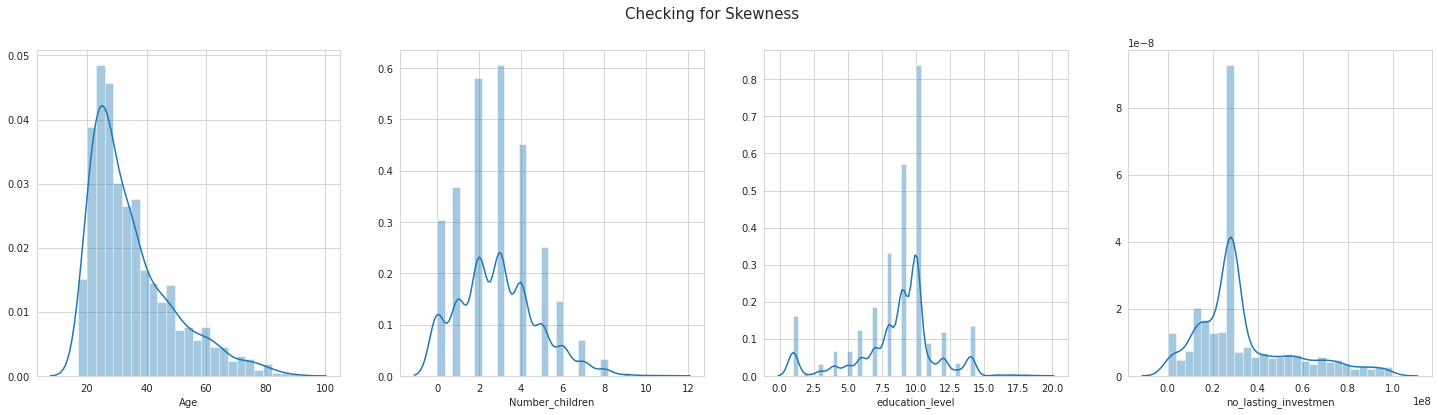

In [8]:
plt.figure(figsize=(25,6))
plt.subplot(1, 4, 1)
sns.distplot(df['Age'])

plt.subplot(1, 4, 2)
sns.distplot(df['Number_children'])

plt.subplot(1, 4, 3)
sns.distplot(df['education_level'])

plt.subplot(1, 4, 4)
sns.distplot(df['no_lasting_investmen'])

plt.suptitle('Checking for Skewness', fontsize = 15)
plt.show()



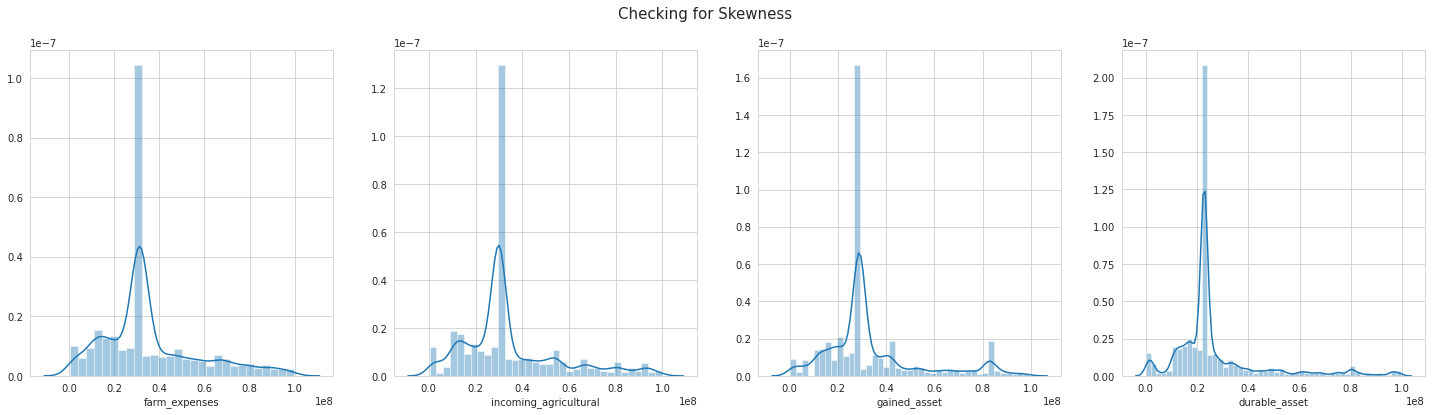

In [9]:
plt.figure(figsize=(25,6))
plt.subplot(1, 4, 1)
sns.distplot(df['farm_expenses'])

plt.subplot(1, 4, 2)
sns.distplot(df['incoming_agricultural'])

plt.subplot(1, 4, 3)
sns.distplot(df['gained_asset'])

plt.subplot(1, 4, 4)
sns.distplot(df['durable_asset'])

plt.suptitle('Checking for Skewness', fontsize = 15)
plt.show()


> level of education is almost normally distributed, as for age, children and no lasting investment all are positively distributed meaning that most of the data is less than the medium same also goes for farm expense, incoming agriculture, gained and durable assets

## 2.2 Relation between features and Depression

### 2.2.1 Personal Info VS depressed

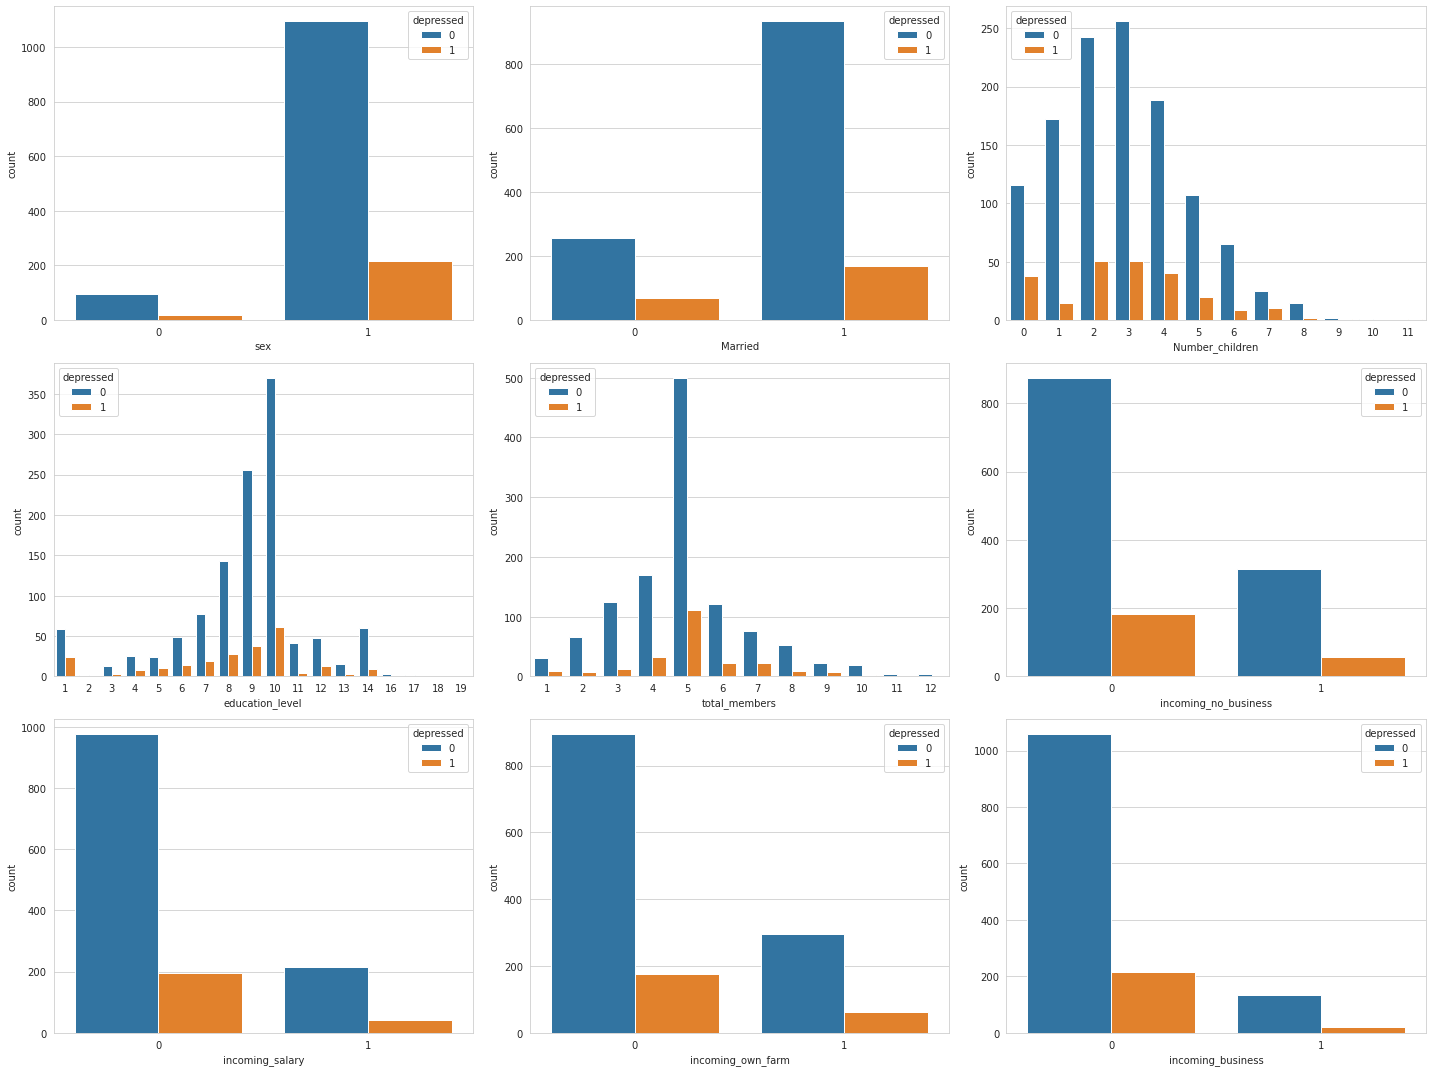

In [10]:
plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
sns.countplot(x='sex', hue='depressed', data=df)
plt.subplot(3,3,2)
sns.countplot(x='Married', hue='depressed', data=df)
plt.subplot(3,3,3)
sns.countplot(x='Number_children', hue='depressed', data=df)

plt.subplot(3,3,4)
sns.countplot(x='education_level', hue='depressed', data=df)
plt.subplot(3,3,5)
sns.countplot(x='total_members', hue='depressed', data=df)
plt.subplot(3,3,6)
sns.countplot(x='incoming_no_business', hue='depressed', data=df)

plt.subplot(3,3,7)
sns.countplot(x='incoming_salary', hue='depressed', data=df)
plt.subplot(3,3,8)
sns.countplot(x='incoming_own_farm', hue='depressed', data=df)
plt.subplot(3,3,9)
sns.countplot(x='incoming_business', hue='depressed', data=df)

plt.tight_layout()
plt.show()

<Figure size 1800x432 with 0 Axes>

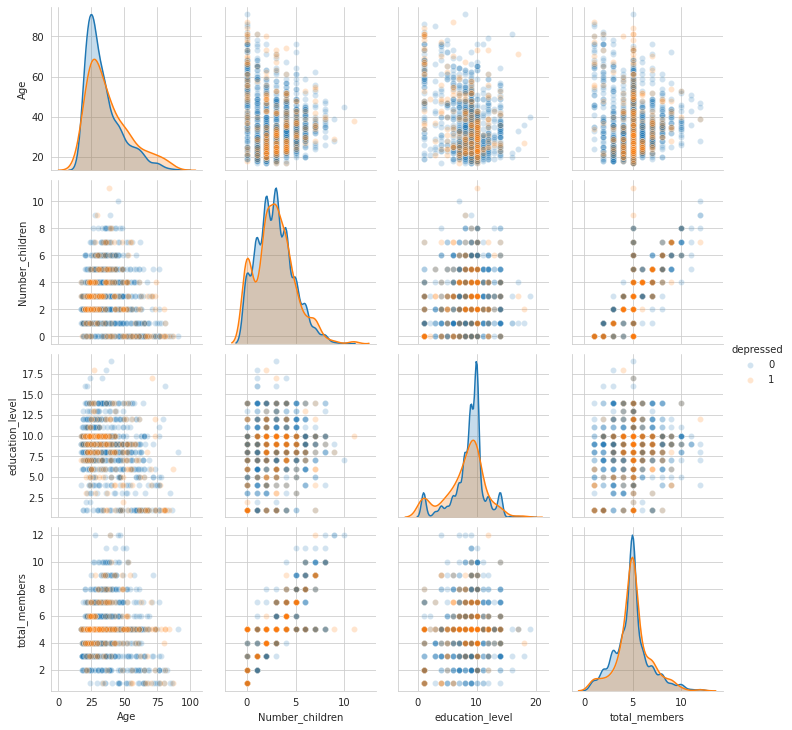

In [11]:
dfPairplot = df.drop(['Survey_id' , 'Married' , 'Ville_id' , 'sex'  , 'gained_asset' , 'durable_asset' , 'save_asset' , 'living_expenses' , 'other_expenses' , 'incoming_salary' , 'incoming_own_farm' , 'incoming_business' , 'incoming_no_business' , 'incoming_agricultural' , 'farm_expenses' , 'labor_primary' , 'lasting_investment' , 'no_lasting_investmen'], axis=1)
dfPairplot.head()
plt.figure(figsize=(25,6))
sns.pairplot(data=dfPairplot,hue='depressed',plot_kws={'alpha':0.2})
plt.show()

>in the observation in this graph the older you and the higher education you the less likely you will get depressed yet children and family members doesn't have the much of an effect

<Figure size 1800x432 with 0 Axes>

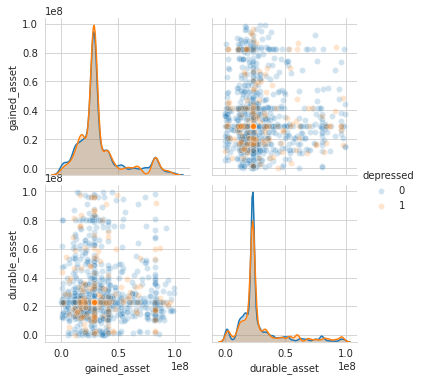

In [12]:
dfPairplot = df.drop(['save_asset','Survey_id' , 'Ville_id' , 'sex' , 'Age' , 'Married' , 'Number_children' , 'education_level' , 'total_members' , 'living_expenses' , 'other_expenses' , 'incoming_salary' , 'incoming_own_farm' , 'incoming_business' , 'incoming_no_business' , 'incoming_agricultural' , 'farm_expenses' , 'labor_primary' , 'lasting_investment' , 'no_lasting_investmen'], axis=1)
dfPairplot.head()
plt.figure(figsize=(25,6))
sns.pairplot(data=dfPairplot,hue='depressed',plot_kws={'alpha':0.2})
plt.show()

gaining assets is not as much effective as durable assets which consistently bring  money to its owner we realize that durable assets increase cause depression

<Figure size 1800x432 with 0 Axes>

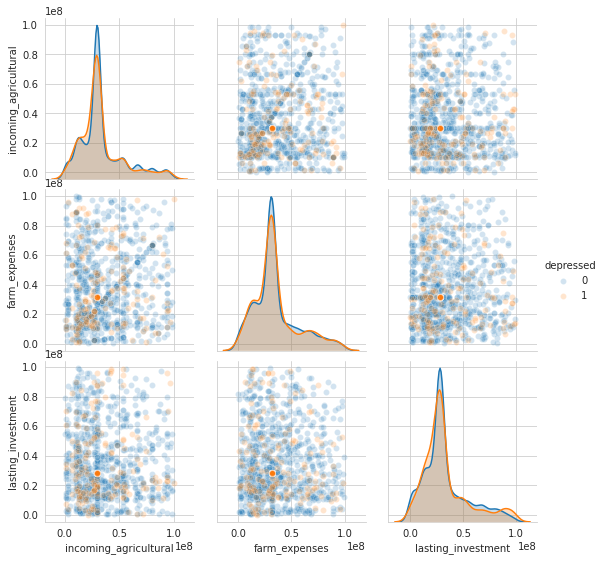

In [13]:
dfPairplot = df.drop(['Survey_id' , 'Ville_id' , 'sex' , 'Age' , 'Married' , 'Number_children' , 'education_level' , 'total_members' , 'gained_asset' , 'durable_asset' , 'save_asset' , 'living_expenses' , 'other_expenses' , 'incoming_salary' , 'incoming_own_farm' , 'incoming_business' , 'incoming_no_business'  , 'labor_primary'     , 'no_lasting_investmen'], axis=1)
dfPairplot.head()
plt.figure(figsize=(25,6))
sns.pairplot(data=dfPairplot,hue='depressed',plot_kws={'alpha':0.2})
plt.show()

> most of the dataset is not depressed, yet you can notice in some spots depression is fairly distributed in all, yet we can find more males, more married, more with no income

### 2.2.2 Age VS depressed

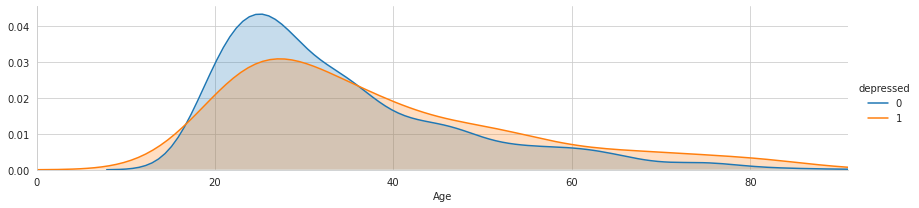

In [14]:
facet = sns.FacetGrid(df,hue="depressed", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0,df['Age'].max()))
facet.add_legend()

plt.show()

in the age from 17,18 to age 35,36 its less likely to get depressed than older than 36 and younger than 17

### 2.2.3 Gain Asset VS depressed

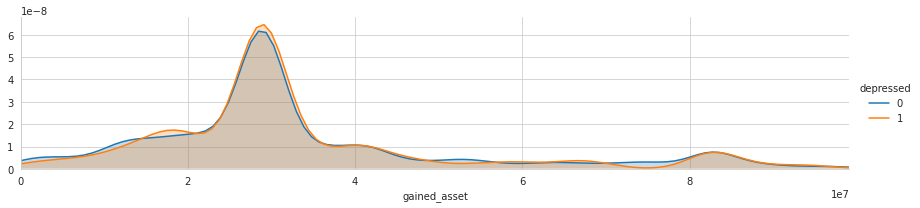

In [15]:
facet = sns.FacetGrid(df,hue="depressed", aspect=4)
facet.map(sns.kdeplot, 'gained_asset', shade=True)
facet.set(xlim=(0,df['gained_asset'].max()))
facet.add_legend()

plt.show()

as we discussed before gained asset is almost averagely distributed and not effective

### 2.2.4 Durable Asset VS depressed

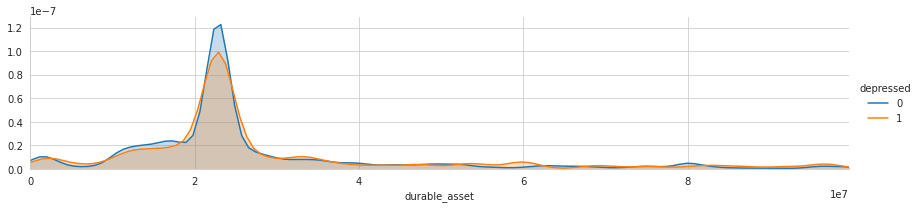

In [16]:
facet = sns.FacetGrid(df,hue="depressed", aspect=4)
facet.map(sns.kdeplot, 'durable_asset', shade=True)
facet.set(xlim=(0,df['durable_asset'].max()))
facet.add_legend()

plt.show()

however people who have from two to 3 durable assets is in favor of being depressed

### 2.2.5 Incoming Agricultural VS depressed

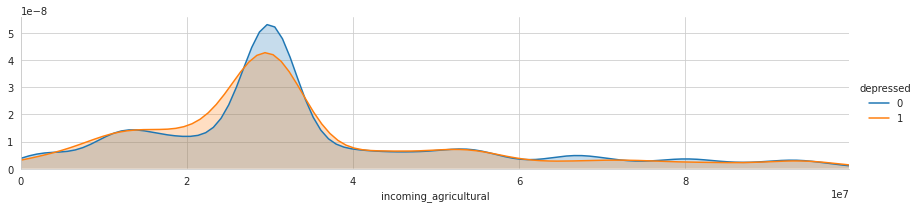

In [17]:
facet = sns.FacetGrid(df,hue="depressed", aspect=4)
facet.map(sns.kdeplot, 'incoming_agricultural', shade=True)
facet.set(xlim=(0,df['incoming_agricultural'].max()))
facet.add_legend()

plt.show()

> from 2.5 to 3.5 incoming agriculture means more not depressed

### 2.2.6 Famr expenses VS depressed

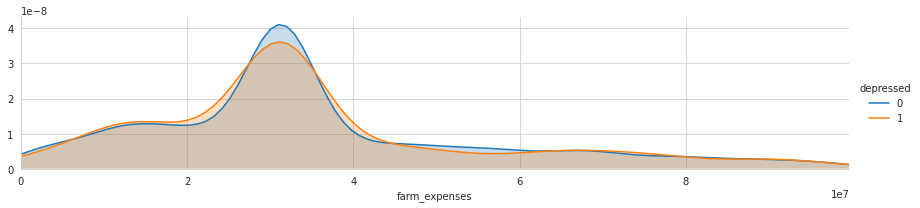

In [18]:
facet = sns.FacetGrid(df,hue="depressed", aspect=4)
facet.map(sns.kdeplot, 'farm_expenses', shade=True)
facet.set(xlim=(0,df['farm_expenses'].max()))
facet.add_legend()

plt.show()

> from 2.5 to 3.5 incoming Farm expenses means more not depressed



### 2.2.7 Lasting investment VS depressed

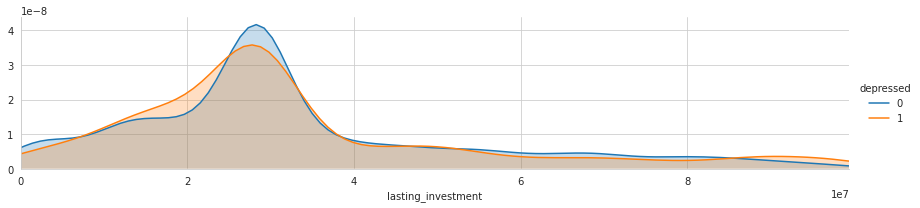

In [19]:
facet = sns.FacetGrid(df,hue="depressed", aspect=4)
facet.map(sns.kdeplot, 'lasting_investment', shade=True)
facet.set(xlim=(0,df['lasting_investment'].max()))
facet.add_legend()

plt.show()

> from 2.5 to 3.5 incoming Lasting investment means more not depressed  

### 2.2.8 Correclation Matrix between features

In [20]:
dfCorr = df.drop(['no_lasting_investmen'], axis=1)

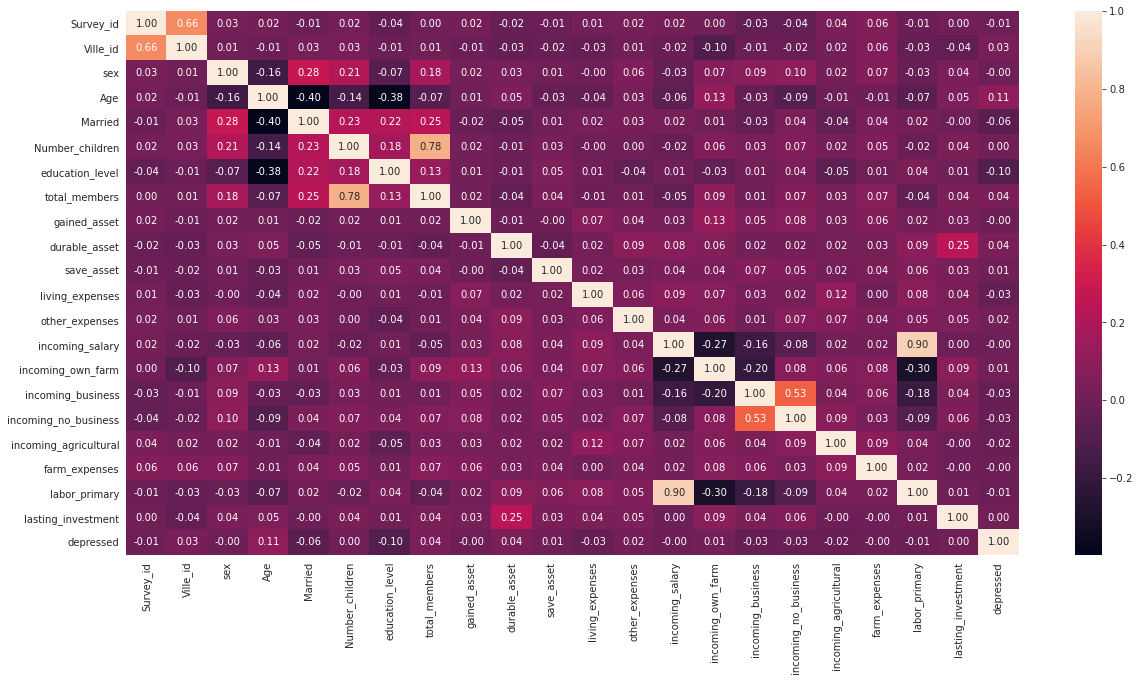

In [21]:
plt.subplots(figsize=(20,10)) 
sns.heatmap(dfCorr.corr(), annot = True, fmt = ".2f")
plt.show()

> It is observed that depression is most correclated with age with 0.11 (positive correclation), and -0.1 with education (negative correclation).

> There is a string correlation between number of family and number of children, this is very logical.


### 2.2.9 Drop unneccessary columns
Now we can drop math score, reading score and writing score, as we will use the pass column instead.

In [22]:
dfDrop = df.drop(['no_lasting_investmen', 'Survey_id', 'Ville_id', 'gained_asset', 'durable_asset', 'save_asset', 'farm_expenses', 'labor_primary', 'Number_children','lasting_investment','incoming_agricultural'], axis=1)

## 3. Models

### This function is for drawing the learning curve.

Learning curve is a measurement to check how well the model learns. This is measured by taking a reading of the accuracy of the algorithm as it trains and also while it is testing. This are plotting to see the convergence.

In [23]:
def plotLearningCurves(X_train, y_train, classifier, title):
    train_sizes, train_scores, test_scores = learning_curve(
            classifier, X_train, y_train, cv=5, scoring="accuracy")
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b" ,label="Training Error")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="r" ,label="Cross Validation Error")
    
    plt.legend()
    plt.grid()
    plt.title(title, fontsize = 18, y = 1.03)
    plt.xlabel('Data Size', fontsize = 14)
    plt.ylabel('Error', fontsize = 14)
    plt.tight_layout()

### This function is for drawing the validation curve.

Cross validation is a measure of how well our model can generalize from what it learns. How well will it perform with data it has neven seen before. This is done by saving part of the data to later predict and measure the accuracy. The training data is split with differing testing folds to be used. Default in this case is k=5 folds.

In [24]:
def plotValidationCurves(X_train, y_train, classifier, param_name, param_range, title):
    train_scores, test_scores = validation_curve(
        classifier, X_train, y_train, param_name = param_name, param_range = param_range,
        cv=5, scoring="accuracy")

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.plot(param_range, train_scores_mean, 'o-', color="b" ,label="Training Error")
    plt.plot(param_range, test_scores_mean, 'o-', color="r" ,label="Cross Validation Error")

    plt.legend()
    plt.grid()
    plt.title(title, fontsize = 18, y = 1.03)
    plt.xlabel('Complexity', fontsize = 14)
    plt.ylabel('Error', fontsize = 14)
    plt.tight_layout()

### This function is for printing the confusion matrix

The confusion matrix shows the frequency for True Positives, True Negatives, False Positives, and False Negative. Also a summary of the different properties can be presented here, along with the accuracy for predicted values.

In [25]:
def printConfusionMatrix(y_train, pred):
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, pred))
    print("Classification Report:",)
    print (classification_report(y_test, pred))
    print("Accuracy:", accuracy_score(y_test, pred))

## 3.1 Random Forest 

In [26]:
X = dfDrop.iloc[:, :-1].values
y = dfDrop.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [27]:
rf = RandomForestClassifier(n_estimators = 9,
                                    max_depth=3,
                                    min_samples_split=9,
                                    min_samples_leaf=5
                                   )
rf.fit(X_train, y_train)
rf_pred1 = rf.predict(X_test)

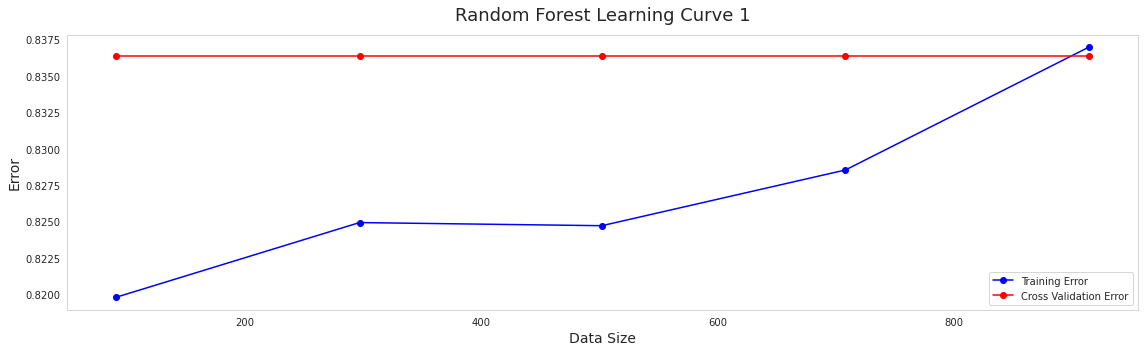

In [28]:
plt.figure(figsize = (16,5))
title = 'Random Forest Learning Curve 1'
plotLearningCurves(X_train, y_train, rf, title)

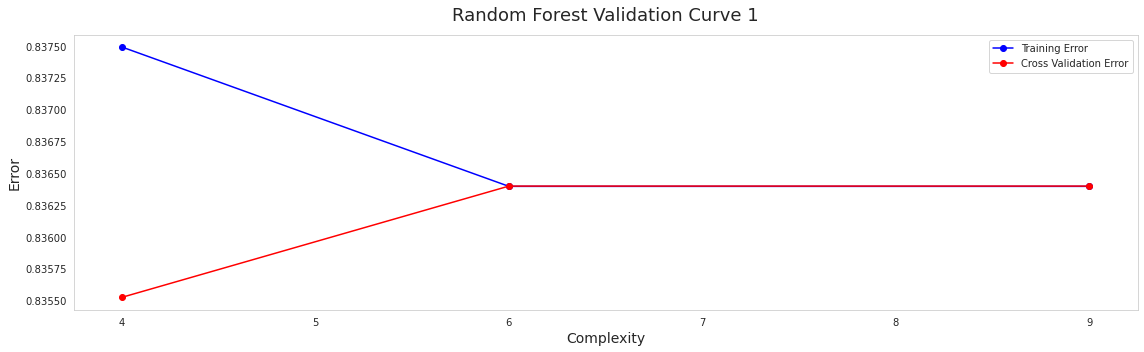

In [29]:
title = 'Random Forest Validation Curve 1'
param_name = 'n_estimators'
param_range = [4, 6, 9]
plt.figure(figsize = (16,5))
plotValidationCurves(X_train, y_train, rf, param_name, param_range, title)

In [30]:
printConfusionMatrix(y_test, rf_pred1)

Confusion Matrix:
[[235   0]
 [ 51   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       235
           1       0.00      0.00      0.00        51

    accuracy                           0.82       286
   macro avg       0.41      0.50      0.45       286
weighted avg       0.68      0.82      0.74       286

Accuracy: 0.8216783216783217


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


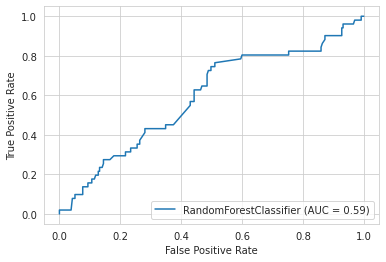

In [31]:
plot_roc_curve(rf, X_test, y_test)
plt.show()


**Using Entropy instead of default (gini)

In [32]:
rf = RandomForestClassifier(n_estimators = 9,
                                    max_depth=3,
                                    criterion='entropy',
                                    min_samples_split=9,
                                    min_samples_leaf=5
                                   )
rf.fit(X_train, y_train)
rf_pred2 = rf.predict(X_test)

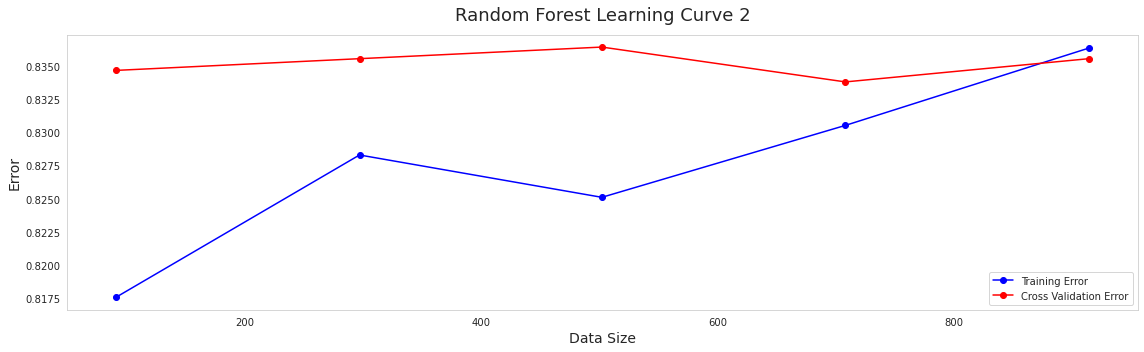

In [33]:
plt.figure(figsize = (16,5))
title = 'Random Forest Learning Curve 2'
plotLearningCurves(X_train, y_train, rf, title)

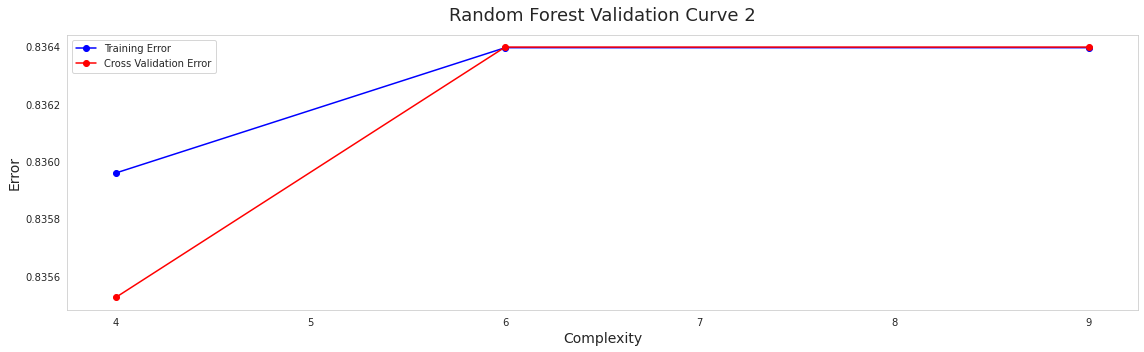

In [34]:
plt.figure(figsize = (16,5))
title = 'Random Forest Validation Curve 2'
param_name = 'n_estimators'
param_range = [4, 6, 9]
plotValidationCurves(X_train, y_train, rf, param_name, param_range, title)

In [35]:
printConfusionMatrix(y_test, rf_pred2)

Confusion Matrix:
[[235   0]
 [ 51   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       235
           1       0.00      0.00      0.00        51

    accuracy                           0.82       286
   macro avg       0.41      0.50      0.45       286
weighted avg       0.68      0.82      0.74       286

Accuracy: 0.8216783216783217


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


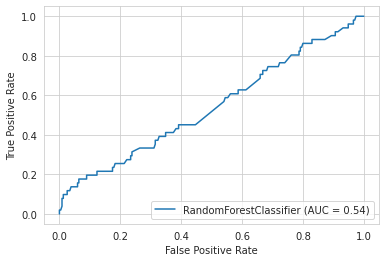

In [36]:
plot_roc_curve(rf, X_test, y_test)
plt.show()

In [37]:
rf = RandomForestClassifier(n_estimators = 9,
                                    max_depth=3,
                                    criterion='entropy',
                                    min_samples_split=10,
                                    min_samples_leaf=5
                                   )
rf.fit(X_train, y_train)
rf_pred3 = rf.predict(X_test)

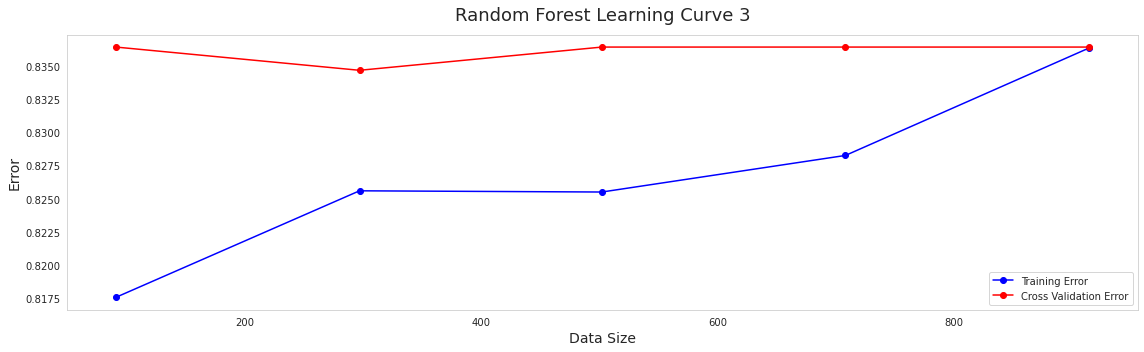

In [38]:
plt.figure(figsize = (16,5))
title = 'Random Forest Learning Curve 3'
plotLearningCurves(X_train, y_train, rf, title)

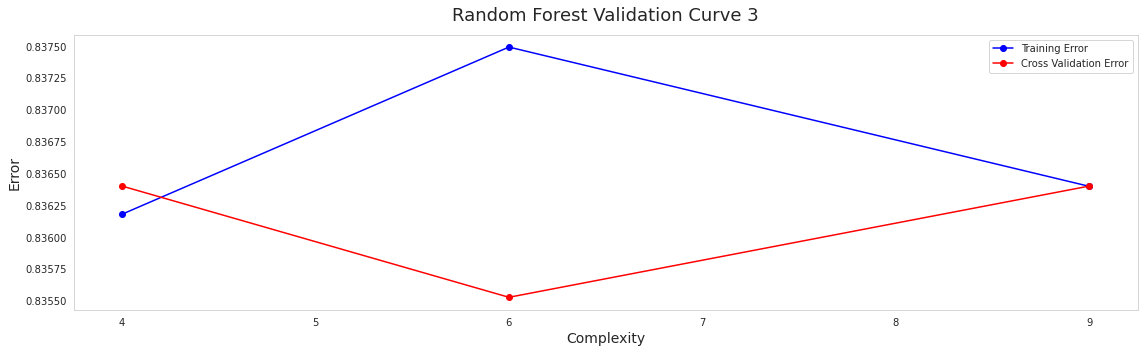

In [39]:
title = 'Random Forest Validation Curve 3'
param_name = 'n_estimators'
param_range = [4, 6, 9]
plt.figure(figsize = (16,5))
plotValidationCurves(X_train, y_train, rf, param_name, param_range, title)

In [40]:
printConfusionMatrix(y_test, rf_pred3)

Confusion Matrix:
[[235   0]
 [ 51   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       235
           1       0.00      0.00      0.00        51

    accuracy                           0.82       286
   macro avg       0.41      0.50      0.45       286
weighted avg       0.68      0.82      0.74       286

Accuracy: 0.8216783216783217


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


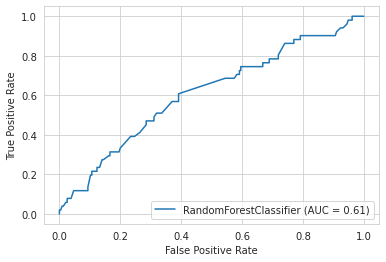

In [41]:
plot_roc_curve(rf, X_test, y_test)
plt.show()

In [42]:
rf = RandomForestClassifier(n_estimators = 9,
                                    max_depth=5,
                                    criterion='entropy',
                                    min_samples_split=9,
                                    min_samples_leaf=10
                                   )
rf.fit(X_train, y_train)
rf_pred4 = rf.predict(X_test)

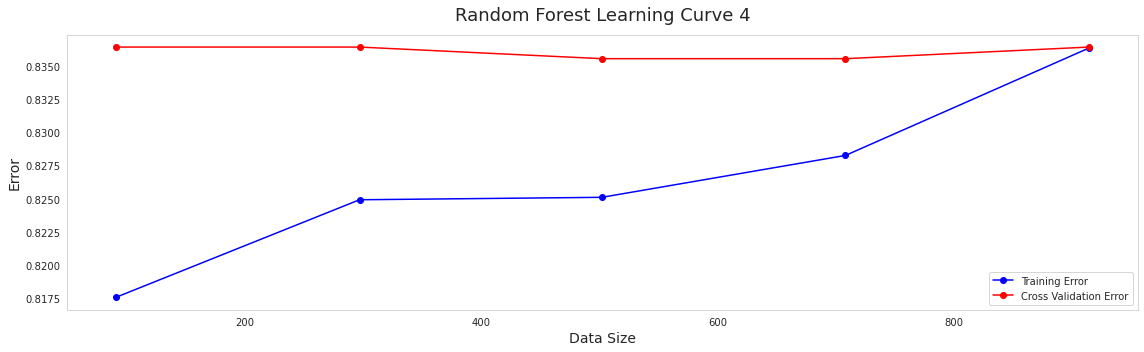

In [43]:
plt.figure(figsize = (16,5))
title = 'Random Forest Learning Curve 4'
plotLearningCurves(X_train, y_train, rf, title)

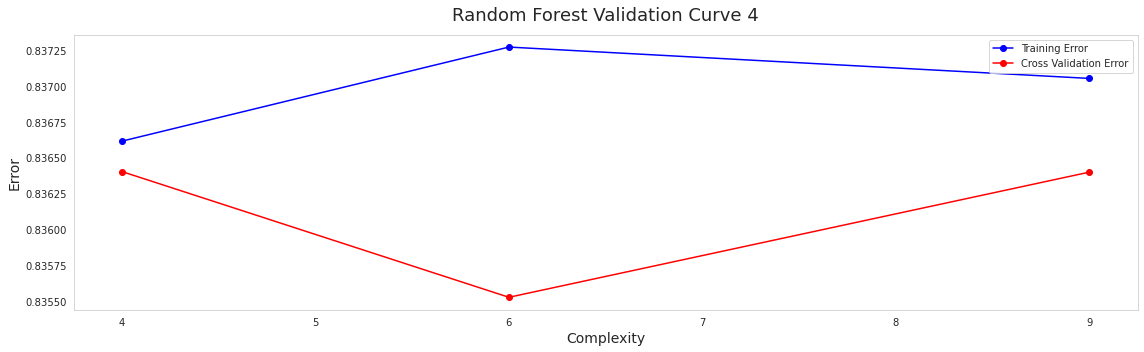

In [44]:
title = 'Random Forest Validation Curve 4'
param_name = 'n_estimators'
param_range = [4, 6, 9]
plt.figure(figsize = (16,5))
plotValidationCurves(X_train, y_train, rf, param_name, param_range, title)

In [45]:
printConfusionMatrix(y_test, rf_pred4)

Confusion Matrix:
[[235   0]
 [ 51   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       235
           1       0.00      0.00      0.00        51

    accuracy                           0.82       286
   macro avg       0.41      0.50      0.45       286
weighted avg       0.68      0.82      0.74       286

Accuracy: 0.8216783216783217


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


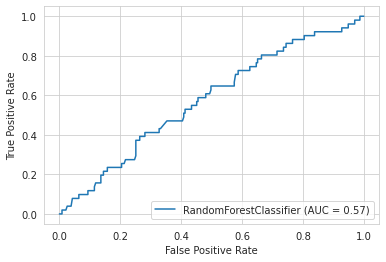

In [46]:
plot_roc_curve(rf, X_test, y_test)
plt.show()

In [47]:
rf = RandomForestClassifier(n_estimators = 9,
                                    max_depth=5,
                                    criterion='entropy',
                                    max_features='sqrt',
                                    min_samples_split=9,
                                    min_samples_leaf=5
                                   )
rf.fit(X_train, y_train)
rf_pred5 = rf.predict(X_test)

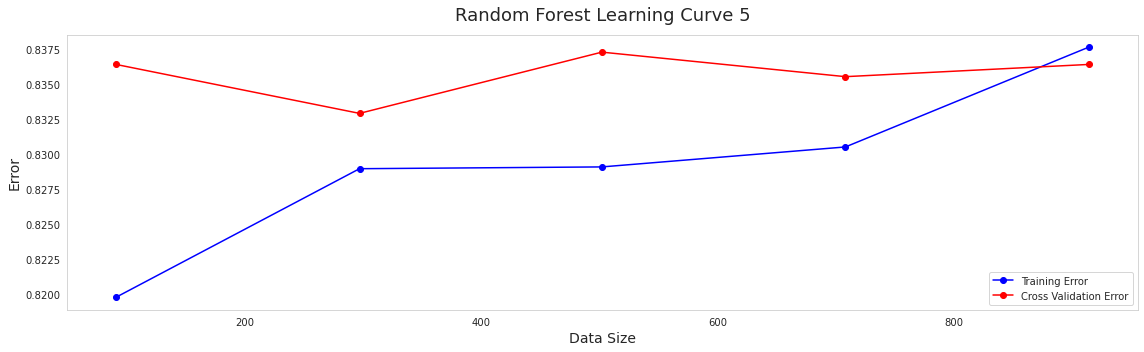

In [48]:
plt.figure(figsize = (16,5))
title = 'Random Forest Learning Curve 5'
plotLearningCurves(X_train, y_train, rf, title)


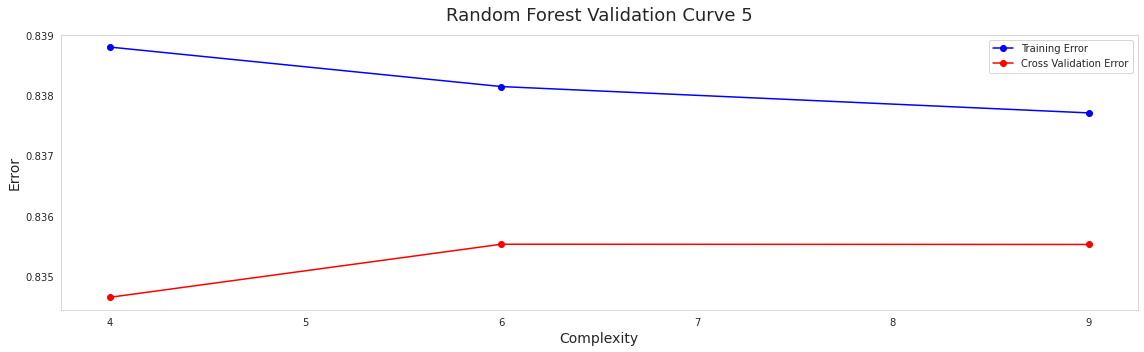

In [49]:
title = 'Random Forest Validation Curve 5'
param_name = 'n_estimators'
param_range = [4, 6, 9]
plt.figure(figsize = (16,5))
plotValidationCurves(X_train, y_train, rf, param_name, param_range, title)


In [50]:

printConfusionMatrix(y_test, rf_pred5)


Confusion Matrix:
[[235   0]
 [ 51   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       235
           1       0.00      0.00      0.00        51

    accuracy                           0.82       286
   macro avg       0.41      0.50      0.45       286
weighted avg       0.68      0.82      0.74       286

Accuracy: 0.8216783216783217


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


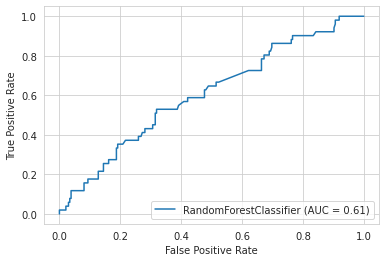

In [51]:
plot_roc_curve(rf, X_test, y_test)
plt.show()

### GridSearch Results

In [52]:
Classifier = RandomForestClassifier()
grid_obj = GridSearchCV(Classifier,
                        {'n_estimators': [4, 6, 9],
                         'max_features': ['log2', 'sqrt','auto'],
                         'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 5, 8],
                         'min_samples_split': [2, 5, 8, 10],
                         'min_samples_leaf': [1, 3, 5]
                        },
                        scoring=make_scorer(accuracy_score))
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
Classifier = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
Classifier.fit(X_train, y_train)

predictions = Classifier.predict(X_test)

print("Best Params: " , grid_obj.best_estimator_)
print("Best Score: " , grid_obj.best_score_)

Best Params:  RandomForestClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=8,
                       n_estimators=4)
Best Score:  0.8390293419137362


## 3.2 KNN

In [ ]:
X = dfDrop.iloc[:, :-1].values
y = dfDrop.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [53]:
# Create KNN classifier
knn=KNeighborsClassifier(n_neighbors=3)
# Fit the classifier to the data
knn.fit(X_train,y_train)
#show first 5 model predictions on the test data
knn_pred1=knn.predict(X_test)

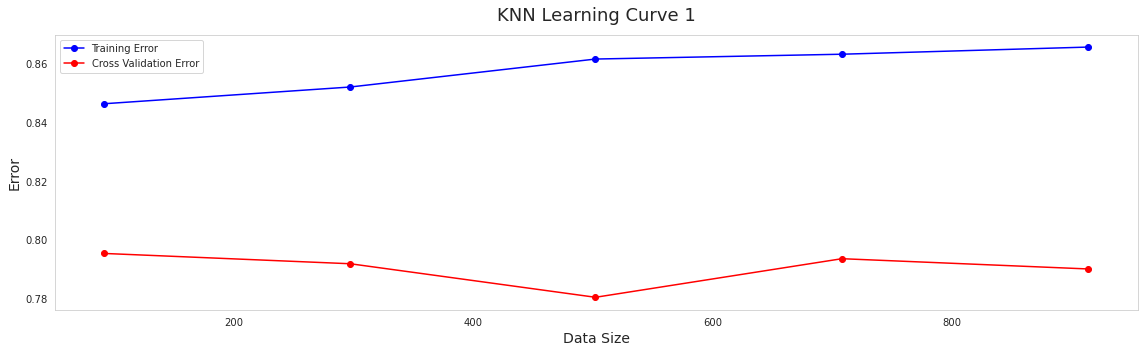

In [54]:
plt.figure(figsize=(16,5))
title='KNN Learning Curve 1'
plotLearningCurves(X_train,y_train,knn,title)

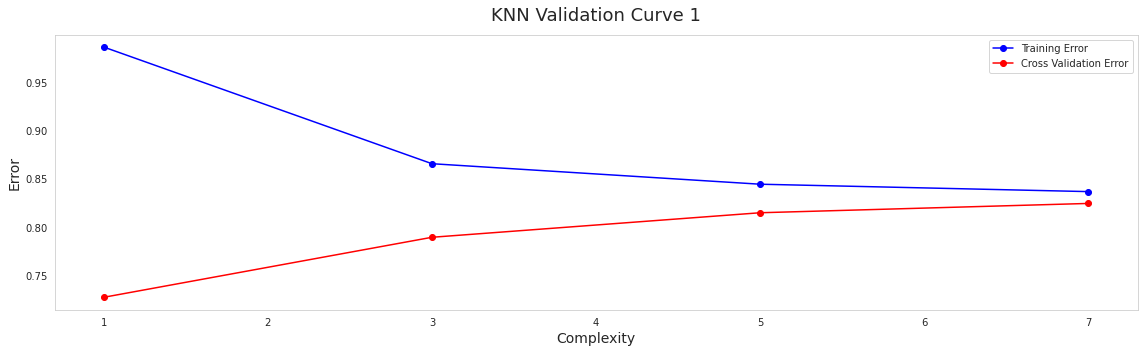

In [55]:
title = 'KNN Validation Curve 1' 
param_name = 'n_neighbors'
param_range = np.arange(1,9,2)
plt.figure(figsize = (16,5))
plotValidationCurves(X_train, y_train, knn, param_name, param_range, title)

In [56]:
printConfusionMatrix(y_test, knn_pred1)

Confusion Matrix:
[[219  16]
 [ 46   5]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       235
           1       0.24      0.10      0.14        51

    accuracy                           0.78       286
   macro avg       0.53      0.51      0.51       286
weighted avg       0.72      0.78      0.74       286

Accuracy: 0.7832167832167832


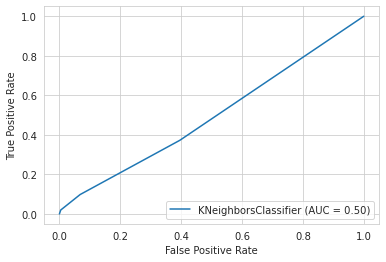

In [57]:
plot_roc_curve(knn, X_test, y_test)
plt.show()

In [58]:
# Create KNN classifier
knn=KNeighborsClassifier(n_neighbors=7)
# Fit the classifier to the data
knn.fit(X_train,y_train)
#show first 5 model predictions on the test data
knn_pred2=knn.predict(X_test)

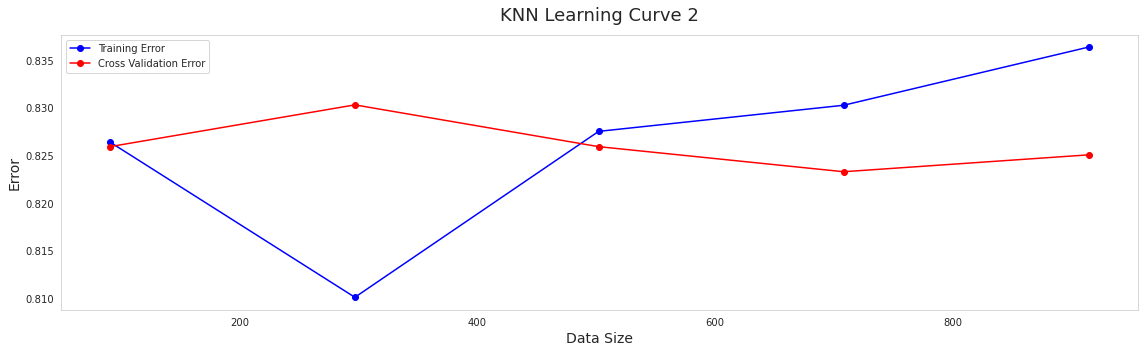

In [59]:
plt.figure(figsize=(16,5))
title='KNN Learning Curve 2'
plotLearningCurves(X_train,y_train,knn,title)

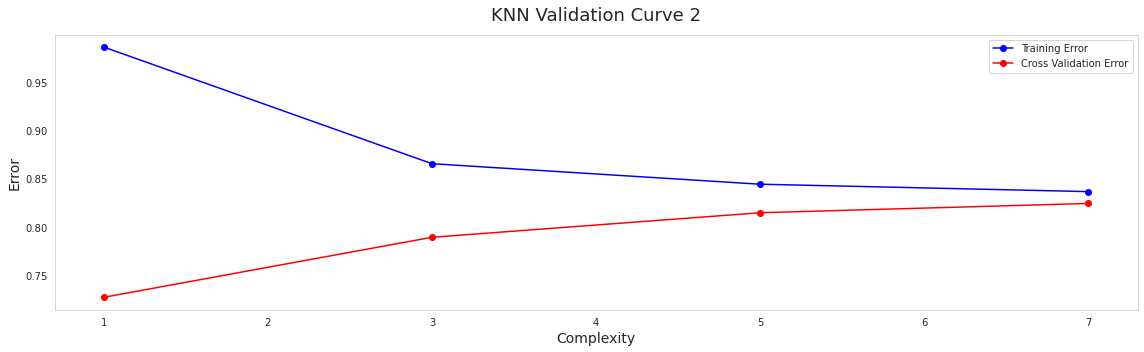

In [60]:
title = 'KNN Validation Curve 2' 
param_name = 'n_neighbors'
param_range = np.arange(1,9,2)
plt.figure(figsize = (16,5))
plotValidationCurves(X_train, y_train, knn, param_name, param_range, title)

In [61]:
printConfusionMatrix(y_test, knn_pred2)

Confusion Matrix:
[[231   4]
 [ 49   2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.98      0.90       235
           1       0.33      0.04      0.07        51

    accuracy                           0.81       286
   macro avg       0.58      0.51      0.48       286
weighted avg       0.74      0.81      0.75       286

Accuracy: 0.8146853146853147


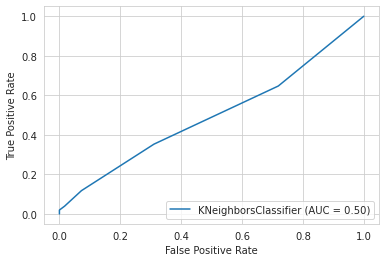

In [62]:
plot_roc_curve(knn, X_test, y_test)
plt.show()

In [63]:
# Create KNN classifier
knn=KNeighborsClassifier(n_neighbors=10)
# Fit the classifier to the data
knn.fit(X_train,y_train)
#show first 5 model predictions on the test data
knn_pred3=knn.predict(X_test)

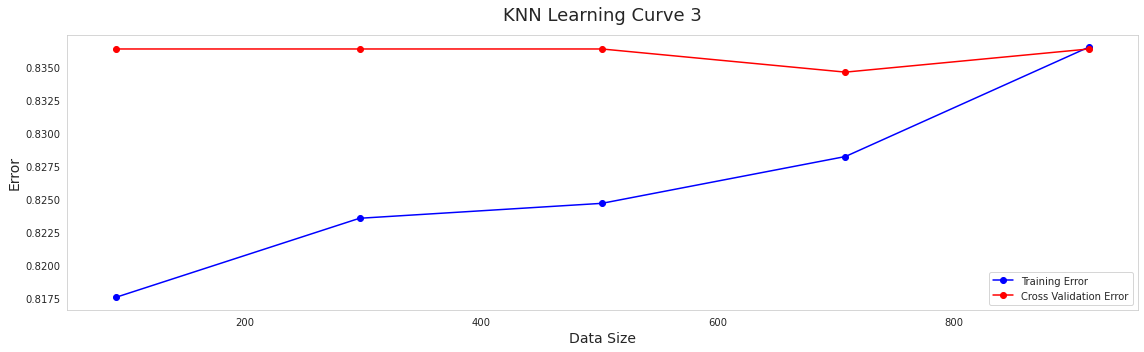

In [64]:
plt.figure(figsize=(16,5))
title='KNN Learning Curve 3'
plotLearningCurves(X_train,y_train,knn,title)

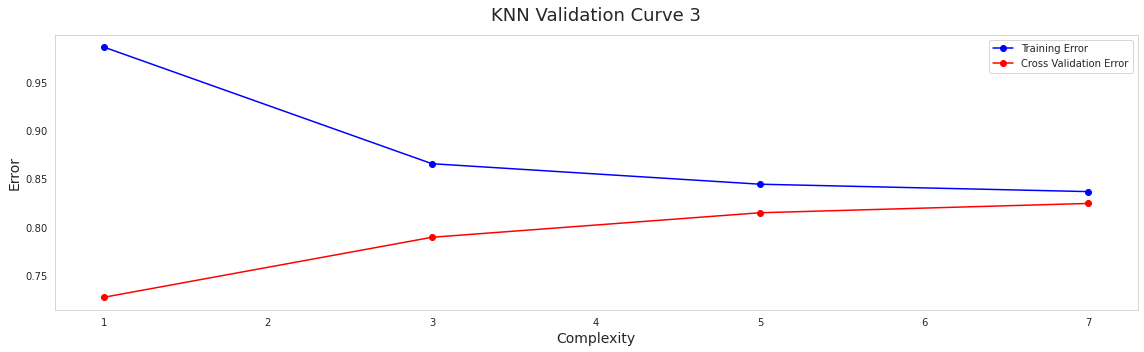

In [65]:
title = 'KNN Validation Curve 3' 
param_name = 'n_neighbors'
param_range = np.arange(1,9,2)
plt.figure(figsize = (16,5))
plotValidationCurves(X_train, y_train, knn, param_name, param_range, title)

In [66]:
printConfusionMatrix(y_test, knn_pred3)

Confusion Matrix:
[[235   0]
 [ 51   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       235
           1       0.00      0.00      0.00        51

    accuracy                           0.82       286
   macro avg       0.41      0.50      0.45       286
weighted avg       0.68      0.82      0.74       286

Accuracy: 0.8216783216783217


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


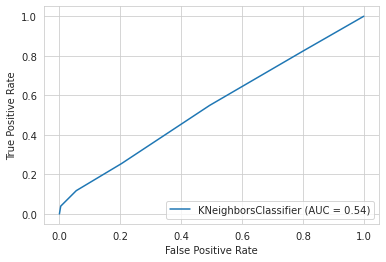

In [67]:
plot_roc_curve(knn, X_test, y_test)
plt.show()

In [68]:
# Create KNN classifier
knn=KNeighborsClassifier(n_neighbors=20)
# Fit the classifier to the data
knn.fit(X_train,y_train)
#show first 5 model predictions on the test data
knn_pred4=knn.predict(X_test)

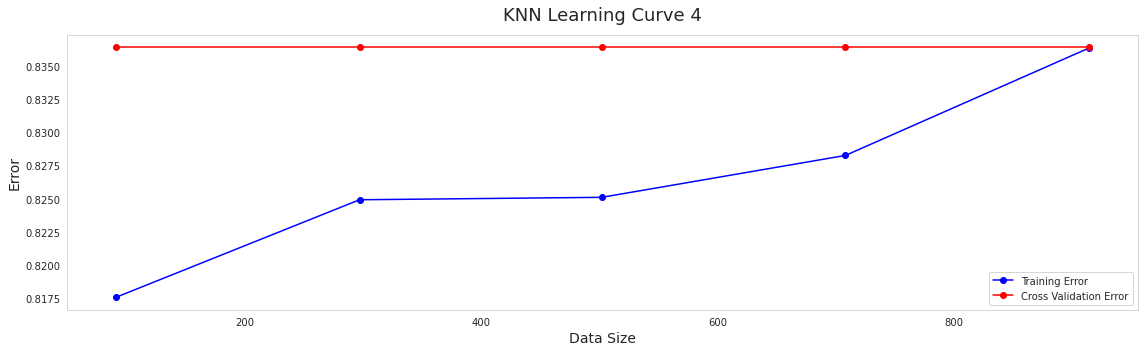

In [69]:
plt.figure(figsize=(16,5))
title='KNN Learning Curve 4'
plotLearningCurves(X_train,y_train,knn,title)

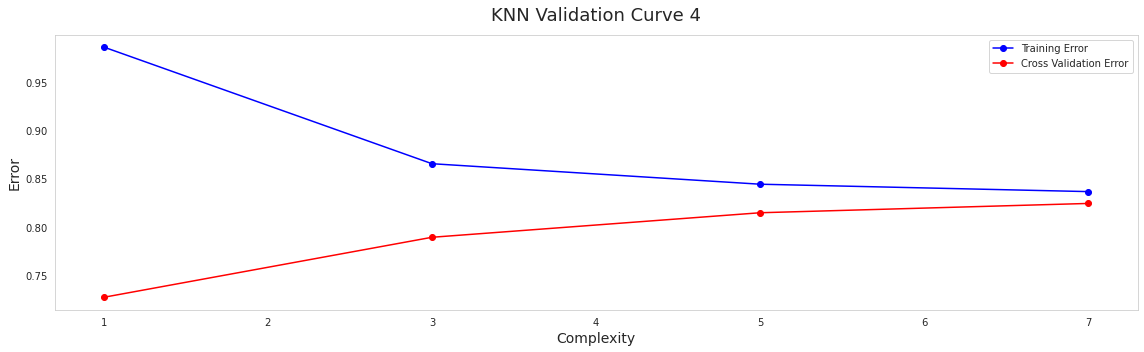

In [70]:
title = 'KNN Validation Curve 4' 
param_name = 'n_neighbors'
param_range = np.arange(1,9,2)
plt.figure(figsize = (16,5))
plotValidationCurves(X_train, y_train, knn, param_name, param_range, title)

In [71]:
printConfusionMatrix(y_test, knn_pred4)

Confusion Matrix:
[[235   0]
 [ 51   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       235
           1       0.00      0.00      0.00        51

    accuracy                           0.82       286
   macro avg       0.41      0.50      0.45       286
weighted avg       0.68      0.82      0.74       286

Accuracy: 0.8216783216783217


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


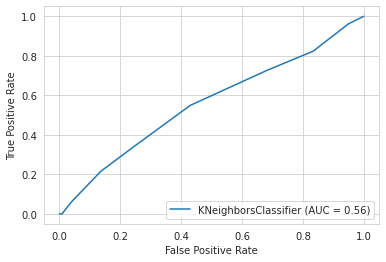

In [72]:
plot_roc_curve(knn, X_test, y_test)
plt.show()

In [73]:
# Create KNN classifier
knn=KNeighborsClassifier(n_neighbors=17)
# Fit the classifier to the data
knn.fit(X_train,y_train)
#show first 5 model predictions on the test data
knn_pred5=knn.predict(X_test)

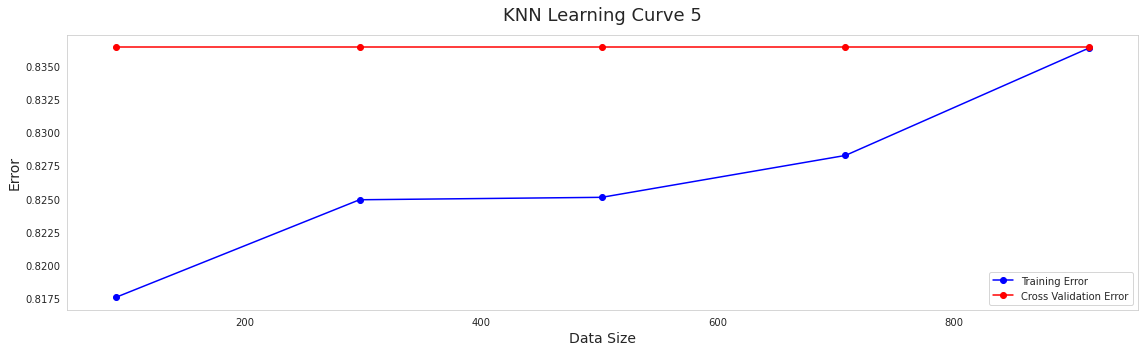

In [74]:
plt.figure(figsize=(16,5))
title='KNN Learning Curve 5'
plotLearningCurves(X_train,y_train,knn,title)

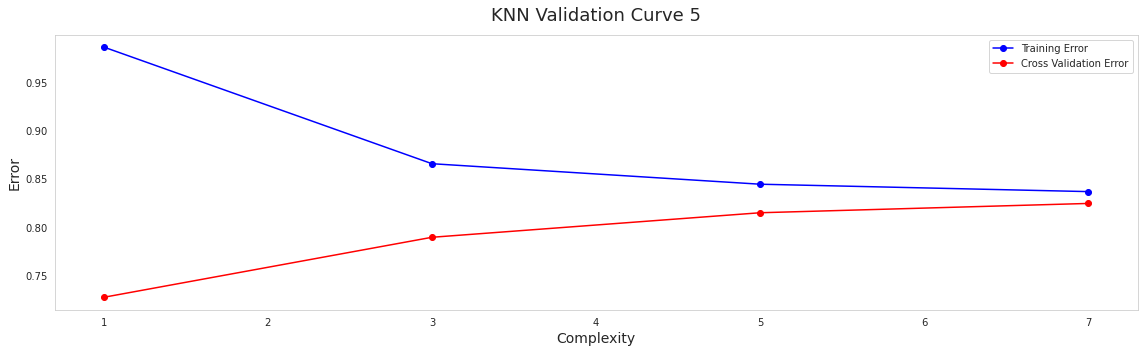

In [75]:
title = 'KNN Validation Curve 5' 
param_name = 'n_neighbors'
param_range = np.arange(1,9,2)
plt.figure(figsize = (16,5))
plotValidationCurves(X_train, y_train, knn, param_name, param_range, title)

In [76]:
printConfusionMatrix(y_test, knn_pred5)

Confusion Matrix:
[[235   0]
 [ 51   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       235
           1       0.00      0.00      0.00        51

    accuracy                           0.82       286
   macro avg       0.41      0.50      0.45       286
weighted avg       0.68      0.82      0.74       286

Accuracy: 0.8216783216783217


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


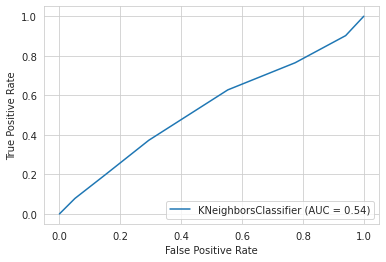

In [77]:
plot_roc_curve(knn, X_test, y_test)
plt.show()

### Grid Search Results

In [78]:
#create new a knn model
knn2=KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid= {'n_neighbors': np.arange(1, 20)}
#use gridsearch to test all values for n_neighbors
knn_gscv=GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)

print("Best Params: " , knn_gscv.best_estimator_)
print("Best Score: " , knn_gscv.best_score_)

Best Params:  KNeighborsClassifier(n_neighbors=10)
Best Score:  0.8341504109925163


# 4. Best Model (Over All AUC) and AutoML

## 4.1 AUC curve over all models

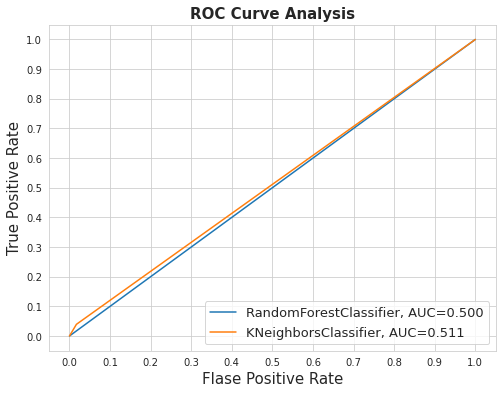

In [79]:

# Instantiate the classfiers and make a list
classifiers = [RandomForestClassifier(),
               KNeighborsClassifier()]

result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])


# print('auc =', auc)
lr_fpr1, lr_tpr1, _ = roc_curve(y_test, rf_pred5)
lr_fpr2, lr_tpr2, _ = roc_curve(y_test,  knn_pred2)

# fpr , tpr, _= roc_curve(X_test, predict6_test)
auc1 = roc_auc_score(y_test, rf_pred5)
auc2 = roc_auc_score(y_test,  knn_pred2)
 
    
result_table = result_table.append({'classifiers':RandomForestClassifier.__class__.__name__,
                                     'fpr':lr_fpr1, 
                                     'tpr':lr_tpr1, 
                                     'auc':auc1}, ignore_index=True)

result_table = result_table.append({'classifiers':KNeighborsClassifier.__class__.__name__,
                                     'fpr':lr_fpr2, 
                                     'tpr':lr_tpr2, 
                                     'auc':auc2}, ignore_index=True)


fig = plt.figure(figsize=(8,6))

plt.plot(result_table.loc[0]['fpr'], 
         result_table.loc[0]['tpr'], 
         label="RandomForestClassifier, AUC={:.3f}".format( result_table.loc[0]['auc']))

plt.plot(result_table.loc[1]['fpr'], 
         result_table.loc[1]['tpr'], 
         label="KNeighborsClassifier, AUC={:.3f}".format( result_table.loc[1]['auc']))


plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()
    